In [1]:
from weightwatcher import WeightWatcher

import matplotlib.pyplot as plt
from matplotlib import cm

import plot_utils

In [2]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("tiiuae/falcon-7b", trust_remote_code=True)

Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.


Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
Loading checkpoint shards: 100%|████████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:26<00:00, 43.14s/it]


In [ ]:
watcher = WeightWatcher(model=model) 
details = watcher.describe()
layer_ids = details[details.layer_type=='LAYER_TYPE.DENSE'].layer_id.to_numpy()
layer_ids = details.layer_id.to_numpy()

layer_names = [str(x) for x in layer_ids]
results =  watcher.analyze(layers=layer_ids, detX=True, svd_method="accurate")

In [12]:
results.to_pickle("falcon-7b-details")

In [2]:
import pickle
with open("falcon-7b-details", "rb") as fp:
  df7 = pickle.load(fp)

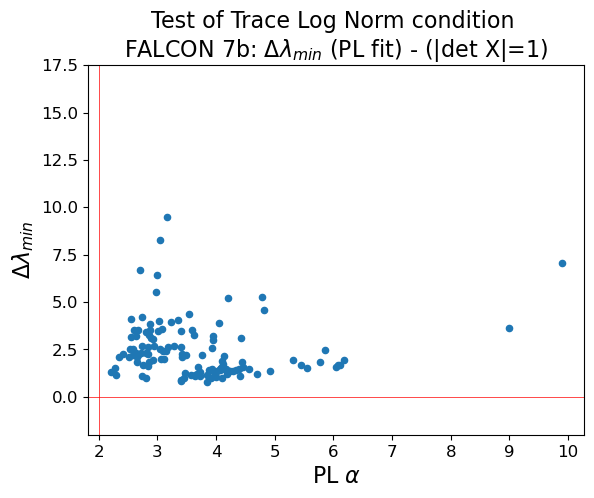

In [3]:
df7.plot.scatter(x='alpha', y='detX_delta')
plt.title("Test of Trace Log Norm condition \n"+r"FALCON 7b: $\Delta\lambda_{min}$ (PL fit) - (|det X|=1)", fontdict={'fontsize': plot_utils.MEDIUM_SIZE})
plt.ylim((-2, 17.5))
plt.xlabel(r"PL $\alpha$")
plt.ylabel(r"$\Delta\lambda_{min}$")
plt.axvline(2, linewidth=0.5, color="red", zorder=-1)
plt.axhline(0, linewidth=0.5, color="red", zorder=-1)
plt.savefig("FALCON7b_ESD_trends.png")

In [2]:
from safetensors import safe_open
import pandas as pd

df = None

for i in range(1, 9):
  filename = f"./falcon-40b_safetensors/model-{i:05}-of-00009.safetensors"
  print(filename)
  state_dict = {}
  with safe_open(filename, framework="pt", device='cpu') as f:
    for k in f.keys():
      state_dict[k] = f.get_tensor(k)
  
  watcher = WeightWatcher(model={"state_dict": state_dict})
  details = watcher.analyze(detX = True)
  
  if df is None: df = details
  else:          df = pd.concat([df, details])

./falcon-40b_safetensors/model-00001-of-00009.safetensors
./falcon-40b_safetensors/model-00002-of-00009.safetensors
./falcon-40b_safetensors/model-00003-of-00009.safetensors
./falcon-40b_safetensors/model-00004-of-00009.safetensors
./falcon-40b_safetensors/model-00005-of-00009.safetensors
./falcon-40b_safetensors/model-00006-of-00009.safetensors
./falcon-40b_safetensors/model-00007-of-00009.safetensors
./falcon-40b_safetensors/model-00008-of-00009.safetensors


In [4]:
df.to_pickle("falcon-40b-details")

In [5]:
import pickle
with open("falcon-40b-details", "rb") as fp:
  df40 = pickle.load(fp)

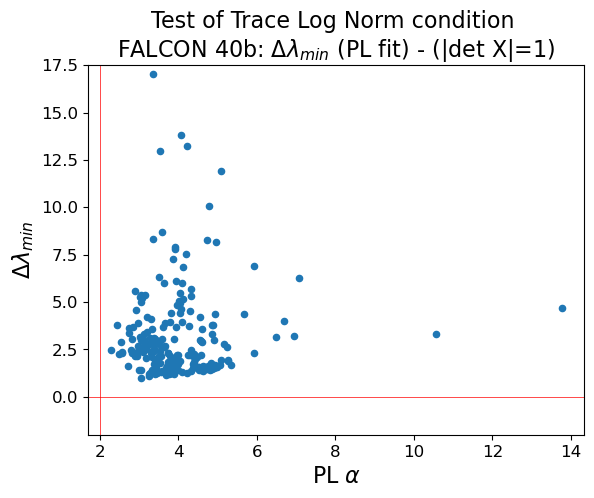

In [6]:
df40.plot.scatter(x='alpha', y='detX_delta')
plt.title("Test of Trace Log Norm condition \n"+r"FALCON 40b: $\Delta\lambda_{min}$ (PL fit) - (|det X|=1)", fontdict={'fontsize': plot_utils.MEDIUM_SIZE})
plt.ylim((-2, 17.5))
plt.xlabel(r"PL $\alpha$")
plt.ylabel(r"$\Delta\lambda_{min}$")
plt.axvline(2, linewidth=0.5, color="red", zorder=-1)
plt.axhline(0, linewidth=0.5, color="red", zorder=-1)
plt.savefig("FALCON40b_ESD_trends.png")
